###Cases para utilização de diversas formar de Machine Learning em ambientes da AWS

Giovana Dovich Costa

In [1]:
pip install boto3

In [6]:
import os #
os.environ['AWS_ACCESS_KEY_ID'] = '...'
os.environ['AWS_SECRET_ACCESS_KEY'] = '...'

###Case 1

O Case 1 explora a implementação do Amazon Rekognition para detectar objetos em imagens armazenadas em um bucket do Amazon S3. Inicialmente, o código estabelece uma conexão com o serviço Rekognition e define o bucket e o caminho da imagem desejada. A imagem é então baixada do S3 para o ambiente local, onde é carregada usando OpenCV. Após a detecção de objetos, os resultados, incluindo os nomes dos objetos e seus níveis de confiança, são exibidos no console. Além disso, são desenhadas caixas delimitadoras (bounding boxes) em torno dos objetos identificados na imagem, que é finalmente exibida, permitindo uma visualização clara das detecções realizadas.

In [8]:
import boto3
from botocore.exceptions import NoCredentialsError, PartialCredentialsError

# Cria o cliente do Amazon Rekognition na região us-east-2
rekognition = boto3.client('rekognition', region_name='us-east-2')

# Define o bucket e o nome da imagem no S3
bucket = 'buckettesteimagem'  # Nome do seu bucket S3
image_name = 'cidade.png'  # Caminho da imagem no bucket

try:
    # Chama o Rekognition para detectar objetos (labels)
    response = rekognition.detect_labels(
        Image={'S3Object': {'Bucket': bucket, 'Name': image_name}},
        MaxLabels=10,  # Número máximo de objetos a detectar
        MinConfidence=75  # Confiança mínima (0 a 100)
    )

    # Exibe os resultados
    for label in response['Labels']:
        print(f"Objeto: {label['Name']}, Confiança: {label['Confidence']:.2f}%")

except NoCredentialsError:
    print("Erro: Credenciais não encontradas.")
except PartialCredentialsError:
    print("Erro: Credenciais incompletas.")
except Exception as e:
    print(f"Erro ao detectar objetos: {e}")


Objeto: Building, Confiança: 100.00%
Objeto: Cityscape, Confiança: 100.00%
Objeto: Urban, Confiança: 100.00%
Objeto: City, Confiança: 100.00%
Objeto: Road, Confiança: 99.27%
Objeto: Car, Confiança: 97.06%
Objeto: Vehicle, Confiança: 97.06%
Objeto: Building Complex, Confiança: 96.38%
Objeto: Bus, Confiança: 93.88%
Objeto: Metropolis, Confiança: 90.49%


Building: 100.00%
Cityscape: 100.00%
Urban: 100.00%
City: 100.00%
Road: 99.27%
Car: 97.06%
Vehicle: 97.06%
Building Complex: 96.38%
Bus: 93.88%
Metropolis: 90.49%


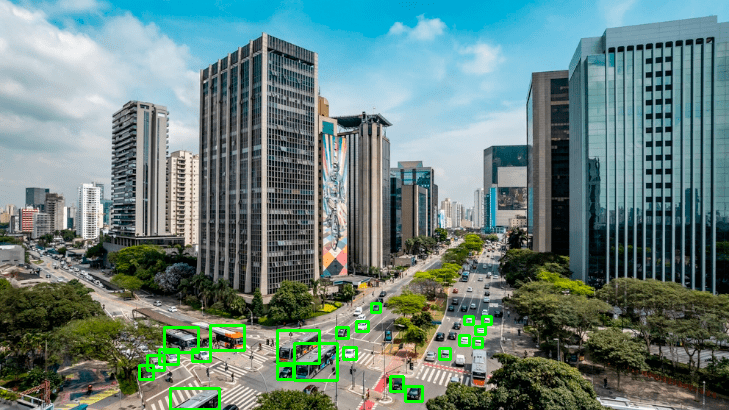

In [51]:
import boto3
import cv2
import numpy as np
import os

# Criação do cliente Rekognition
rekognition_client = boto3.client('rekognition', region_name='us-east-2')

# Define o bucket e o nome da imagem no S3
bucket = 'buckettesteimagem'  # Nome do seu bucket S3
image_name = 'cidade.png'  # Nome da imagem no bucket
local_image_path = 'cidade.png'  # Caminho local onde a imagem será salva

# Baixando a imagem do S3 para o ambiente local
s3_client = boto3.client('s3')
s3_client.download_file(bucket, image_name, local_image_path)

# Carregando a imagem original após o download
img = cv2.imread(local_image_path)

# Verifique se a imagem foi carregada corretamente
if img is None:
    print(f"Erro: Não foi possível carregar a imagem de {local_image_path}.")
else:
    # Chamando o Rekognition para detectar labels
    response = rekognition_client.detect_labels(
        Image={'S3Object': {'Bucket': bucket, 'Name': image_name}},
        MaxLabels=10,  # Número máximo de objetos a detectar
        MinConfidence=75  # Confiança mínima (0 a 100)
    )

    # Exibindo os resultados e desenhando as bounding boxes
    for label in response['Labels']:
        print(f"{label['Name']}: {label['Confidence']:.2f}%")
        for instance in label['Instances']:
            box = instance['BoundingBox']
            left = int(box['Left'] * img.shape[1])
            top = int(box['Top'] * img.shape[0])
            width = int(box['Width'] * img.shape[1])
            height = int(box['Height'] * img.shape[0])
            cv2.rectangle(img, (left, top), (left + width, top + height), (0, 255, 0), 2)

    # Exibindo a imagem com as bounding boxes
    from google.colab.patches import cv2_imshow  # Importando a função de exibição para o Colab
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


###Case 2

O Case 2 explora a utilização do Amazon Translate para a tradução automática de documentos em formato TXT armazenados no Amazon S3, visando facilitar a comunicação em ambientes multilíngues. A implementação começa com a configuração do ambiente AWS e a seleção de um arquivo de texto para tradução. Utilizando a API do Amazon Translate, o conteúdo do arquivo é extraído e enviado para o serviço, que realiza a tradução para o idioma desejado, retornando o texto traduzido. Os resultados podem ser armazenados de volta no S3 ou exibidos diretamente, permitindo que organizações e desenvolvedores integrem facilmente a tradução automática em suas aplicações. Este case demonstra como o Amazon Translate pode ser uma solução prática e eficiente para superar barreiras linguísticas, promovendo uma comunicação mais fluida.


In [37]:
import boto3

# Cria o cliente do Amazon Translate
translate = boto3.client('translate', region_name='us-east-2')  # Ou sua região específica

In [38]:
# Texto que você deseja traduzir
text_to_translate = "Olá, como você está?"

# Defina a língua de origem e a língua de destino
source_language = 'pt'  # Português
target_language = 'en'  # Inglês

# Chama o Amazon Translate para traduzir o texto
response = translate.translate_text(
    Text=text_to_translate,
    SourceLanguageCode=source_language,
    TargetLanguageCode=target_language
)

# Exibe o resultado
translated_text = response['TranslatedText']
print(f"Texto traduzido: {translated_text}")


Texto traduzido: Hello, how are you?


In [11]:
import boto3

# Cria o cliente do S3
s3 = boto3.client('s3')

# Defina o nome do bucket e o nome do arquivo
bucket_name = 'buckettesteimagem'
file_name = 'retrato.txt'

# Faz o download do arquivo e lê seu conteúdo
response = s3.get_object(Bucket=bucket_name, Key=file_name)
text_to_translate = response['Body'].read().decode('utf-8')

In [12]:
# Cria o cliente do Amazon Translate
translate = boto3.client('translate', region_name='us-east-1')  # Ou sua região específica

# Defina a língua de origem e a língua de destino
source_language = 'pt'  # Ajuste conforme necessário
target_language = 'en'  # Ajuste conforme necessário

# Chama o Amazon Translate para traduzir o texto
response = translate.translate_text(
    Text=text_to_translate,
    SourceLanguageCode=source_language,
    TargetLanguageCode=target_language
)

# Exibe o resultado
translated_text = response['TranslatedText']
print(f"Texto traduzido:\n{translated_text}")


Texto traduzido:
I didn't have that face today,
So calm, so sad, so thin,
Not even these empty eyes,
Not even the bitter lip.

I didn't have these hands without strength,
So still and cold and dead;
I didn't have that heart
That doesn't even show.

I didn't notice this change,
So simple, so certain, so easy:
— In which mirror was she lost
my face?


In [13]:
# Salva o texto traduzido em um novo arquivo no S3
output_file_name = 'retrato_traduzido.txt'
s3.put_object(Bucket=bucket_name, Key=output_file_name, Body=translated_text.encode('utf-8'))
print(f"Texto traduzido salvo em: {output_file_name}")


Texto traduzido salvo em: retrato_traduzido.txt


###Case 3

O Case 3 aborda o uso do Amazon Comprehend para realizar a análise de sentimentos em textos, com foco em sua aplicação para monitoramento de feedbacks de clientes em plataformas online. O processo inicia com a configuração do ambiente AWS e a definição de um conjunto de textos, que podem incluir comentários, avaliações e postagens em redes sociais. Através da API do Amazon Comprehend, esses textos são enviados para análise, e o serviço retorna informações sobre a polaridade dos sentimentos expressos (positivo, negativo, neutro ou misto) e a confiança associada a essas classificações. Os resultados são então utilizados para gerar insights sobre a percepção do cliente, permitindo que as empresas ajustem suas estratégias de marketing e atendimento com base nas emoções identificadas nos comentários.

In [14]:
import boto3

# Cria o cliente do Amazon Comprehend
comprehend = boto3.client('comprehend', region_name='us-east-1')

# Texto para análise de sentimentos
texts_to_analyze = [
    "Eu amo este produto! Ele funciona muito bem.",
    "O atendimento ao cliente foi péssimo e não estou satisfeito.",
    "O serviço é razoável, poderia ser melhor."
]

# Análise de sentimentos para cada texto
for text in texts_to_analyze:
    response = comprehend.detect_sentiment(Text=text, LanguageCode='pt')
    sentiment = response['Sentiment']
    print(f"Texto: {text}\nSentimento Detectado: {sentiment}\n")


Texto: Eu amo este produto! Ele funciona muito bem.
Sentimento Detectado: POSITIVE

Texto: O atendimento ao cliente foi péssimo e não estou satisfeito.
Sentimento Detectado: NEGATIVE

Texto: O serviço é razoável, poderia ser melhor.
Sentimento Detectado: POSITIVE



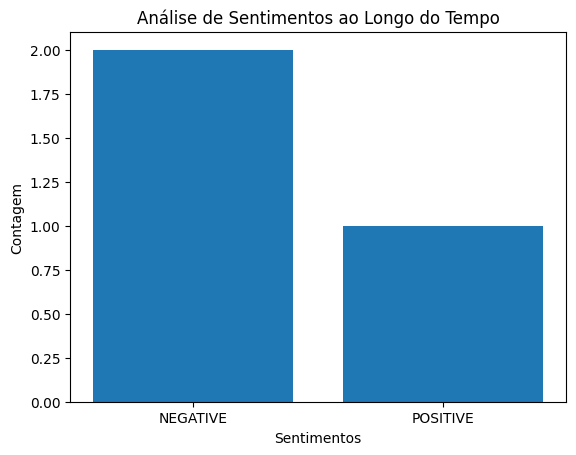

In [15]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt

# Cria o cliente do Amazon Comprehend
comprehend = boto3.client('comprehend', region_name='us-east-1')

# Função para analisar sentimentos
def analyze_sentiment(texts):
    sentiments = []
    for text in texts:
        response = comprehend.detect_sentiment(Text=text, LanguageCode='pt')
        sentiments.append(response['Sentiment'])
    return sentiments

# Coletando dados ao longo do tempo
data = {
    'data': ['2023-01-01', '2023-02-01', '2023-03-01'],
    'comentarios': [
        "Eu amei o novo design do produto!",
        "O atendimento foi muito lento e frustrante.",
        "Não gostei das mudanças na política de devoluções."
    ]
}

df = pd.DataFrame(data)
df['sentimentos'] = analyze_sentiment(df['comentarios'])

# Visualizando os resultados
sentiment_counts = df['sentimentos'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Análise de Sentimentos ao Longo do Tempo')
plt.xlabel('Sentimentos')
plt.ylabel('Contagem')
plt.show()
